# ------------- Model Creation Using Random forest ------------------- 

### Importing Libraries

In [16]:
import pandas as pd
import numpy as np
import matplotlib as plt
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import r2_score,confusion_matrix,accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


### Importing Dataset

In [18]:
df = pd.read_csv("ML_Thyroid Detection data.csv")

In [19]:
df.head()

,age,sex,TSH measured,TSH,T3 measured,T3,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,Classes
0,0.430108,0,1,0.002443,1,0.232227,1,0.287383,1,0.429952,1,0.272265,2
1,0.236559,0,1,0.007726,1,0.184834,1,0.233645,0,0.352657,0,0.267176,2
2,0.483871,1,1,0.001840,0,0.184834,1,0.250000,1,0.318841,1,0.300254,2
3,0.741935,0,1,0.000292,1,0.175355,1,0.404206,0,0.352657,0,0.267176,2
4,0.741935,0,1,0.001349,1,0.109005,1,0.137850,1,0.299517,1,0.173028,2


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3771 entries, 0 to 3770
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   age           3771 non-null   float64
 1   sex           3771 non-null   int64  
 2   TSH measured  3771 non-null   int64  
 3   TSH           3771 non-null   float64
 4   T3 measured   3771 non-null   int64  
 5   T3            3771 non-null   float64
 6   TT4 measured  3771 non-null   int64  
 7   TT4           3771 non-null   float64
 8   T4U measured  3771 non-null   int64  
 9   T4U           3771 non-null   float64
 10  FTI measured  3771 non-null   int64  
 11  FTI           3771 non-null   float64
 12  Classes       3771 non-null   int64  
dtypes: float64(6), int64(7)
memory usage: 383.1 KB


In [21]:
X = df.drop(['Classes'],axis=1)
y = df['Classes']                     # Target Attribute

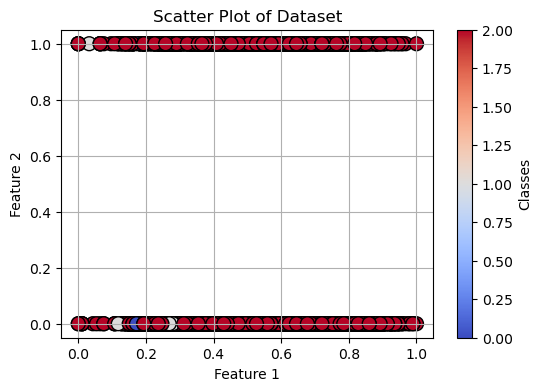

In [22]:
# X is feature matrix and y is your target variable
# X should be a 2D array where each row represents a data point and each column represents a feature


X = df.drop(['Classes'], axis=1)  # Features
y = df['Classes']                  # Target variable

# Create scatter plot
plt.figure(figsize=(6, 4))
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolor='k', s=100)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Scatter Plot of Dataset')
plt.colorbar(label='Classes')
plt.grid(True)
plt.show()


### Over Sampling

In [23]:
sample = RandomOverSampler()
X_sampled,y_sampled  = sample.fit_resample(X,y)

### Separting Data for Test & Train Split

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X_sampled, y_sampled, test_size=0.2, random_state=42)

### Model Creation

In [25]:
RF_Classifier = RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_split=5)
RF_Classifier.fit(X_train,y_train)
y_pred=RF_Classifier.predict(X_test)
r2_score(y_test,y_pred)

0.9876453737203118

**Observation** :- model was found to give almost 98.00  Accuracy

#### Accuracy of the Model

In [26]:
Accuracy = accuracy_score(y_test,y_pred)
print(Accuracy*100)

99.16859122401847


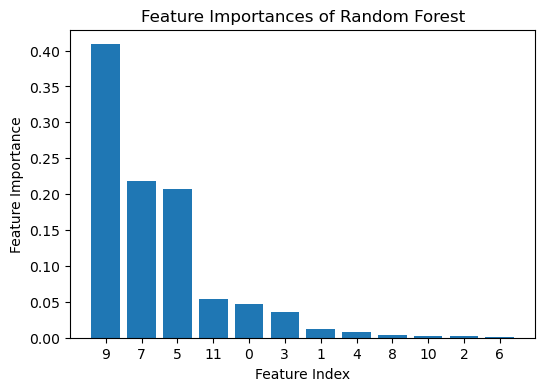

In [27]:
# Plot feature importances
importances = RF_Classifier.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(6, 4))
plt.bar(range(X_train.shape[1]), importances[indices], align='center')
plt.xticks(range(X_train.shape[1]), indices)
plt.xlabel('Feature Index')
plt.ylabel('Feature Importance')
plt.title('Feature Importances of Random Forest')
plt.show()


### Confusion Matrix

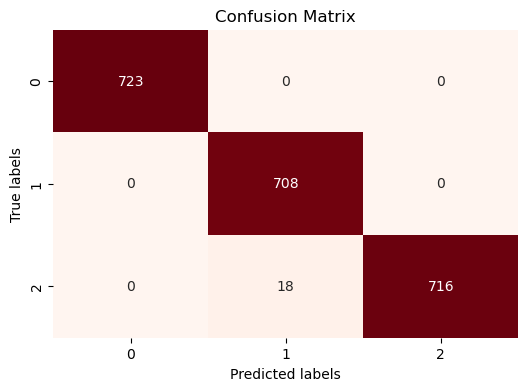

In [28]:
Matrix = confusion_matrix(y_test, y_pred)
# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(Matrix, annot=True, cmap='Reds', fmt='g', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


#### saving Model

In [30]:
import joblib

joblib.dump(RF_Classifier,'model.pkl')

['model.pkl']